# First example: fitting a 1D model to a generated spiral
A 1-dimensional simplex is just an edge, so fitting a 1D model is just fitting a topological graph to a dataset.  This is a good place to start because

1. it is relatively easy to understand, and
2. there are exact formulae for the EM algorithm.

For more complicated models we have the added complexity of having to estimate values using Markov chains, for the case of fitting a graph this is not required.

## Imports

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from smm.lemm import GraphMM, GLEMM_Parameters

## Generate data around a spiral

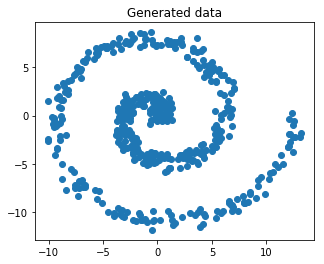

In [2]:
N = 500
rnd = np.random.RandomState(123)
t = 4 * np.pi * rnd.rand(N)
X = np.vstack([t * np.cos(t), t * np.sin(t)]).T
X += 0.5 * rnd.standard_normal(X.shape)

plt.figure(figsize=(5,4))
plt.title("Generated data")
plt.scatter(X[:,0], X[:,1]); plt.show()

## Fitting a model

For simplicial mixture models with only 0 and 1 dimensional simplices there is an exact EM algorithm, so let's use that.  This is implemented as part of the GraphMM class.

We fit a model with 20 vertices, initialised by randomly selecting points from the data.  In the left plot we show the latent variable of the resulting model against the original data.  In the right plot we generate a sample from the fitted model.

In [3]:
def fit_model(m, n_iter, seed=None):
    rnd = np.random.RandomState(seed)
    n = X.shape[1]
    L = GraphMM(m, n, include_nodes=True, rnd=rnd)
    V = X[rnd.choice(range(X.shape[0]), m, replace=False)]
    θ = GLEMM_Parameters(V, L.M, covar_type='spherical', covar=0.1)

    for i in range(n_iter):
        θ = L.step(θ, X)
    return L, θ

L, θ = fit_model(20, 50, seed=123) # Change the seed for a different fit

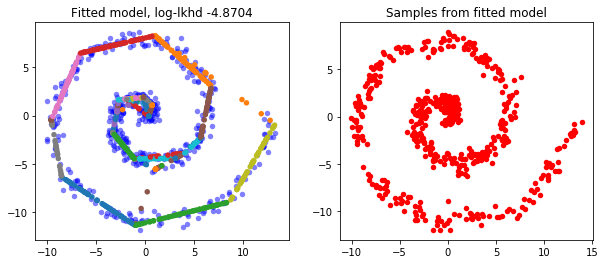

In [4]:
Y,_ = L.noisy_sample(θ, 500)
Z,indices = L.sample(θ, 1000)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.set_title(f"Fitted model, log-lkhd {L.log_likelihood(θ, X):.4f}")
ax1.scatter(X[:,0], X[:,1], c='blue', lw=0, s=30, alpha=0.5)
ax1.scatter(Z[:,0], Z[:,1], c=indices%13, cmap="tab10", lw=0, s=30)

ax2.set_title("Samples from fitted model")
ax2.scatter(Y[:,0], Y[:,1], c='red', lw=0, s=30)
plt.show()

## Different initialisations

The initialisation is random, in this next example we choose fewer vertices, reducing the chance of a good fit and show the results for 6 different initialisations.  A greater number of iterations may improve the shown log-likelihoods for some of these, but only up to a point.

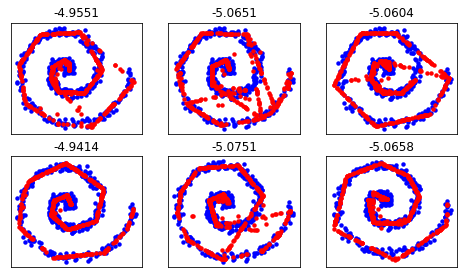

In [5]:
fig, axes = plt.subplots(2,3,figsize=(8,4.5))
for seed, ax in zip(range(6), axes.reshape(6)):
    L, θ = fit_model(15, 25, seed=seed)
    
    ax.set_title(f"{L.log_likelihood(θ, X):.4f}")
    ax.set_xticks(()); ax.set_yticks(())

    Z,_ = L.sample(θ, 500)
    ax.scatter(X[:,0], X[:,1], c='b', lw=0, s=20)
    ax.scatter(Z[:,0], Z[:,1], c='r', lw=0, s=20)